## Exploratory Activity 1: Introduction to Atmospheric Data Analysis

__1.1 Creating a Time Series__

Examine the monthly CO<sub>2</sub> mixing ratios measured at Mauna Loa (Hawaii, USA), Pt. Barrow (Alaska, USA), and the South Pole (Antarctica) during 2013:

|Site|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|
|--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |
|MLO|399.55|396.80|397.43|398.41|399.78|398.61|397.32|395.20|393.45|393.70|395.16|396.84|
|PTB|401.09|402.35|403.00|402.32|403.27|400.80|390.00|387.26|388.63|395.22|399.59|403.77|
|SPO|391.19|391.26|391.31|391.71|392.32|392.82|393.36|393.91|394.08|394.03|394.03|394.07|



**Question 1.1.1** Create lists called "MLO_CO2", "PTB_CO2", and "SPO_CO2" containing the mixing ratio data. A list called "months" has been created for you with the names of each month.

In [2]:
# Create a list of months to be used to identify each column in our data
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
MLO_CO2 = [399.55,396.80,397.43,398.41,399.78,398.61,397.32,395.20,393.45,393.70,395.16,396.84]
PTB_CO2 = [401.09,402.35,403.00,402.32,403.27,400.80,390.00,387.26,388.63,395.22,399.59,403.77]
SPO_CO2 = [391.19,391.26,391.31,391.71,392.32,392.82,393.36,393.91,394.08,394.03,394.03,394.07]

**Question 1.1.2** Add code to the field below to make a line graph of how the CO<sub>2</sub> mixing ratios at these three sites change over time. The necessary functions have already been imported for you and the MLO_CO2 variable has already been plotted as an example.

In [3]:
%%capture
# first install the graphing library
!pip install matplotlib

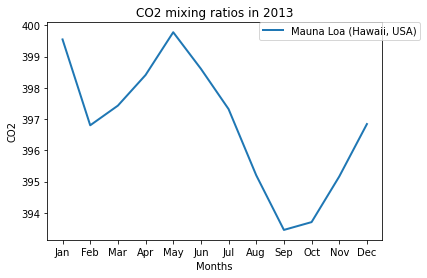

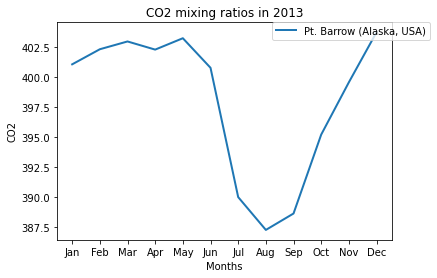

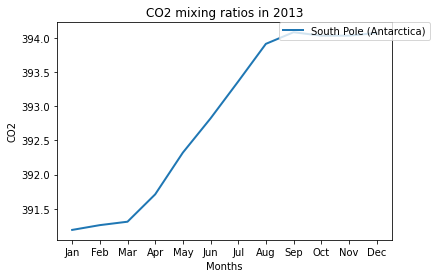

In [4]:
# import the graphing library for the first time with the abbrviated name 'plt'
import matplotlib.pyplot as plt
# from the matplotlib library import 'figure' so we can play with subplots
from matplotlib.pyplot import figure

# create a subplot instance and store referenes to the figure and axis
# this particular subplot has a 'w'hite background and a blac'k' edge around it
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add data to the 'plt' using the plot function defining the x and y data
ax.plot(months, MLO_CO2, linewidth=2, label='Mauna Loa (Hawaii, USA)')
## ENTER CODE HERE TO PLOT PTB_CO2 TIME SERIES
## ENTER CODE HERE TO PLOT SPO_CO2 TIME SERIES

# The graphing library calling functions to set title and labels
# to find out more fun functions see: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.html
plt.title('CO2 mixing ratios in 2013')
plt.xlabel('Months')
plt.ylabel('CO2')

#add a legend
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

#show the final plot
plt.show()

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(months, PTB_CO2, linewidth=2, label='Pt. Barrow (Alaska, USA)')
plt.title('CO2 mixing ratios in 2013')
plt.xlabel('Months')
plt.ylabel('CO2')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.show()

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(months, SPO_CO2, linewidth=2, label='South Pole (Antarctica)')
plt.title('CO2 mixing ratios in 2013')
plt.xlabel('Months')
plt.ylabel('CO2')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.show()

The graph you made above is called a "time series" because it shows the change in a data series over time. Although one of the simplest forms of data analysis, time series can be very powerful in that they reveal patterns and invite comparisons between numerical data. Examine your time series closely.

**Question 1.1.3** During which month is the minimum CO<sub>2</sub> concentration observed at each site? Why do you think that is?

**Question 1.1.4** Compare the magnitude of variation in CO<sub>2</sub> concentrations at each site. What do you think is responsible for these differences in variability?

Now let's examine some larger datasets of CO<sub>2</sub> mixing ratios measured at College Preparatory School, Kaiser Center, and Fred T. Korematsu Elementary School (all right here in the Bay Area!) during 2013. The code below imports the data from a website, places it in an easy-to-use format called a "dataframe," and reconfigures the associated timestamps.

Even though a large quantity of code has been provided for you, make sure to read through each line and the associated comments so that you understand what each part does. When you need to do perform similar actions in the future, you will refer back to this example code as a reference.

In [5]:
%%capture
# first install libraries for loading and manipulating data
!pip install pandas
!pip install numpy

In [7]:
# import the loading and data manipulation libraies for the first time
import pandas as pd
import numpy as np

# declare a variable called 'url' to be used for the API to access data over the internet
# for more information on this dataset visit: http://beacon.berkeley.edu
url = "http://beacon.berkeley.edu/node/37,54,31/measurements/csv?name=Multiselect%20Download&interval=60&start=2013-02-01%2000:00:00&end=2013-12-31%2000:00:00"

# load the comma delimited data into a dataframe using pandas
CO2_2013_data  = pd.read_csv(url)

# note: each node is identified by a node_id in the file
# College Preparatory School is 37
# Kaiser Center is 54 
# Fred T. Korematsu Elementary School is 31

# create column in the dataframe called 'timestamp' using the 'local_timestamp' column 
# and teach the program to treat it as a date object using a date format mask
CO2_2013_data['timestamp']=pd.to_datetime(CO2_2013_data['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')

# now set the 'timestamp' column to be the index of each row
CO2_2013_data.index=CO2_2013_data['timestamp']

# cleanup our dataframe by removing unneeded columns
CO2_2013_data=CO2_2013_data.drop(['local_timestamp','datetime','PM_ug/m3_37','PM_ug/m3_54','PM_ug/m3_31','PM_ug/m3_QC_level_37','co_ppm_QC_level_37','co_ppm_37','co2_ppm_QC_level_37','co_ppm_54','co_ppm_31'],axis=1)

# replace any -999 data (which flags bad data) with a special value for 'not a number' (NaN)
CO2_2013_data = CO2_2013_data.replace(-999,np.NaN)

# remove all the rows with NaN values as they won't help our comparison
CO2_2013_data.dropna(inplace=True)

# print the first 10 lines of data to see what we're working with
CO2_2013_data[0:10]

,epoch,julian_day,co2_ppm_37,co2_ppm_54,co2_ppm_31,timestamp
timestamp,,,,,,
2013-02-01 00:00:00,1.359706e+09,32.333333,436.0,455.3,433.0,2013-02-01 00:00:00
2013-02-01 01:00:00,1.359709e+09,32.375000,431.9,438.5,438.5,2013-02-01 01:00:00
2013-02-01 02:00:00,1.359713e+09,32.416667,453.3,457.6,429.4,2013-02-01 02:00:00
2013-02-01 03:00:00,1.359716e+09,32.458333,494.2,452.1,432.7,2013-02-01 03:00:00
2013-02-01 04:00:00,1.359720e+09,32.500000,471.6,448.9,433.4,2013-02-01 04:00:00
2013-02-01 05:00:00,1.359724e+09,32.541667,468.4,455.6,428.8,2013-02-01 05:00:00
2013-02-01 06:00:00,1.359727e+09,32.583333,480.7,457.2,427.9,2013-02-01 06:00:00
2013-02-01 07:00:00,1.359731e+09,32.625000,522.0,466.2,433.5,2013-02-01 07:00:00
2013-02-01 08:00:00,1.359734e+09,32.666667,544.5,507.1,431.8,2013-02-01 08:00:00


The variable "CO2_2013_data" created above is a "list of lists" known as a dataframe containing the CO<sub>2</sub> mixing ratios for the three sites mentioned above, as well as the associated timestamps. 


**Question 1.1.5** Extract the mixing ratios for each site as a separate variable. Also extract a variable containing the "julian_day" column. As an example, the variable containing the College Preparatory School (CPS) data have been created for you.

*Hint: You may need to consult the comments in the code block above to know which site is which!*

In [8]:
CPS_CO2=CO2_2013_data['co2_ppm_37']
KC_CO2= CO2_2013_data['co2_ppm_54']
FTK_CO2= CO2_2013_data['co2_ppm_31']
julian_day= CO2_2013_data['julian_day']

Note: Julian day is a common timestamping convention in which the portion to the left of the decimal tells you the day of the year and the portion to the right of the decimal tells you the fraction of said day that has elapsed. A julian_day = 3.5, for example, would coincide to noon on 3 January, while julian_day = 218.25 would correspond to 6am on 6 August (in a non-leap year).

A helpful table of Julian day values can be found [here](https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html).


**Question 1.1.6** Plot a time series of the three sites' mixing ratios below using 'julian_day' as the x variable. Consult the example code you used to graph the monthly CO<sub>2</sub> mixing ratios you encountered earlier in this activity as a guide.

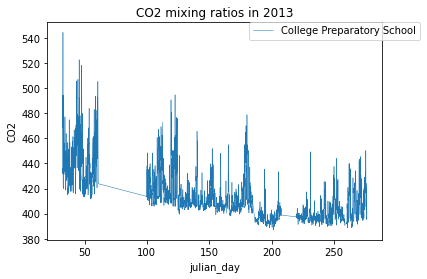

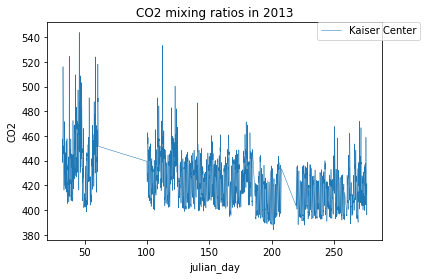

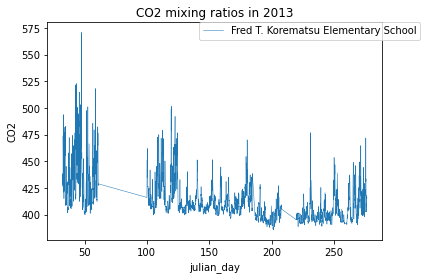

In [9]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(julian_day, CPS_CO2, linewidth=0.5, label='College Preparatory School')
plt.title('CO2 mixing ratios in 2013')
plt.xlabel('julian_day')
plt.ylabel('CO2')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.show()

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(julian_day, KC_CO2, linewidth=0.5, label='Kaiser Center')
plt.title('CO2 mixing ratios in 2013')
plt.xlabel('julian_day')
plt.ylabel('CO2')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.show()

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(julian_day, FTK_CO2, linewidth=0.5, label='Fred T. Korematsu Elementary School')
plt.title('CO2 mixing ratios in 2013')
plt.xlabel('julian_day')
plt.ylabel('CO2')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
plt.show()

__1.2 Analyzing Correlations__

While examining the similarities and differences between two time series by eye can be very informative, sometimes a more direct comparison is called for. We can analyze the correlation between two variables by plotting one as a function of another in a graph called a "scatter" plot.


The code below demonstrates how to make a scatter plot showing the CO<sub>2</sub> mixing ratio measured at College Preparatory School as a function of that measured at Fred T. Korematsu Elementary School.

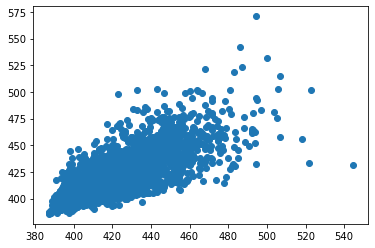

In [10]:
# example comparing College Preparatory School to Fred T. Korematsu School using a scatter plot
plt.scatter(CPS_CO2, FTK_CO2)

When plotting correlations, it is often helpful to add a line that depicts what a perfect 1 to 1 relationship between the two variables would look like. The code below accomplishes this task; read through the code and the associated comments to make sure you understand how it works.


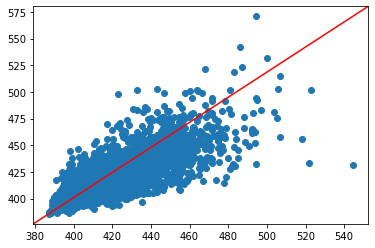

In [11]:
# import modules 'lines' as 'mlines' and 'transforms' as 'mtransforms' from the matplotlib library for use in creating the 1 to 1 line
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# using suplots again allows us to easily plot additional information in the same plot
# we keep reference to the axis as 'ax' for later use
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# compare College Preparatory School to Fred. T Korematsu Elementary using a scatter plot added to the 'ax' instance directly
ax.scatter(CPS_CO2, FTK_CO2)

# add a red 1 to 1 line
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

**Question 1.2.1** Practice this process yourself by making a scatter plot showing the CO<sub>2</sub> mixing ratio measured at the Kaiser Center as a function of that measured at Fred T. Korematsu Elementary School. Include a red 1:1 line on your scatter plot.

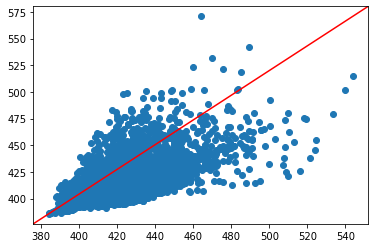

In [12]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.scatter(KC_CO2, FTK_CO2)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

We can also assess the degree of correlation between two variables mathematically. There are many ways of doing this, each with their own strengths and weaknesses depending on the assumptions being made. A common metric is the "coefficient of determination" or R<sup>2</sup> value. R<sup>2</sup> values close to 1 indicate a strong relationship between the two variables, while values closer to 0 indicate less correlation.

A sample R<sup>2</sup> calculation for the correlation between mixing ratios at College Preparatory School and Fred T. Korematsu Elementary School is shown below. It requires loading a special library of statistical functions called "sklearn."


In [13]:
%%capture
# install the sklearn module built on top of scipy for machine learning
!pip install sklearn

In [14]:
# import the r2_score module for use in calculating the "coefficient of determination" or 'r squared'
from sklearn.metrics import r2_score

# calculate the 'r squared' between College Preparatory School and Fred T. Korematsu Elementary School
print(r2_score( CPS_CO2, FTK_CO2,  multioutput='variance_weighted'))

0.6081932464931297


**Question 1.2.2** Practice calculating your own R<sup>2</sup> values for: 

(1) the correlation between the College Preparatory School data record and the Kaiser Center mixing ratios, and 

(2) the correlation between the Fred T. Korematsu Elementary School data record and the Kaiser Center mixing ratios.

In [15]:
print(r2_score( CPS_CO2, KC_CO2,  multioutput='variance_weighted'))

print(r2_score( FTK_CO2, KC_CO2,  multioutput='variance_weighted'))

-0.14765268050121105
-0.048950960837901514


**Question 1.2.3** Based on the R<sup>2</sup> values, which two datasets appear to be the most tightly correlated?

Even without these numerical metrics, we can tell visually that these datasets are strongly correlated (in that their correlation plots are clustered around the 1 to 1 line) but with a fair amount of "scatter" (in that a large proportion of points do not fall precisely on the 1 to 1 line).

__1.3 Averaging and Smoothing__

The CO<sub>2</sub> mixing ratios analyzed in the previous section were presented at 1 hour resolution. The "scatter" observed in the correlation could be feasibly attributed to short-term variations in CO<sub>2</sub> specific to each site, while perhaps longer term variations are shared across all sites. To test this hypothesis, we calculate the *monthly* average CO<sub>2</sub> mixing ratio at the College Preparatory School. 


In [16]:
# using the groupby function of the dataframe allows us to easily group by month using 'M'
CO2_2013_data_grouped = CO2_2013_data.groupby(pd.Grouper(freq='M'))

# taking the mean of the grouped variable allows us to access the CO2 measurements over the month as one averaged value
CO2_2013_data_grouped_avg=CO2_2013_data_grouped.mean()

We can check our work by plotting the hour data and monthly time series on the same graph:

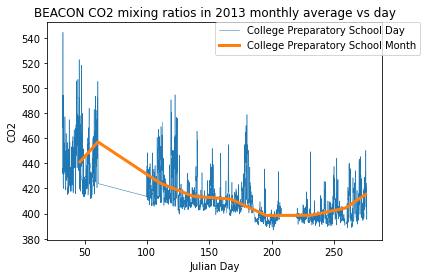

In [17]:
# using suplots again to plot additional information in the same plot
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add the hourly 'julian_day' and CPS_CO2 values to the x and y axis
ax.plot( CO2_2013_data['julian_day'], CPS_CO2,linewidth=.5,label='College Preparatory School Day')

# add the monthly 'julian_day' and CPS_CO2 values to the x and y axis
ax.plot( CO2_2013_data_grouped_avg['julian_day'], CO2_2013_data_grouped_avg['co2_ppm_37'],linewidth=3,label='College Preparatory School Month')

# add labels
plt.xlabel('Julian Day')
plt.ylabel('CO2')
plt.title('BEACON CO2 mixing ratios in 2013 monthly average vs day')
#add a legend with adjusted position
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

Notice that we do not in fact need to extract the hourly (or monthly) CO<sub>2</sub> mixing ratios as separate variables in order to plot them; we can reference the columns of the dataframe directly in our plotting code!

**Question 1.3.1** Practice this yourself by plotting monthly CO<sub>2</sub> mixing ratios at the Kaiser Center and Fred T. Korematsu Elementary School and checking your work with two time series graphs.

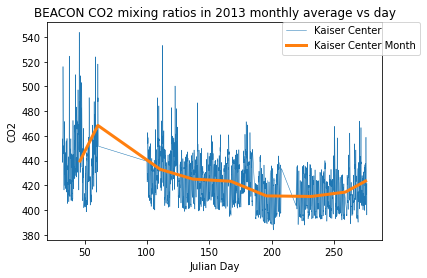

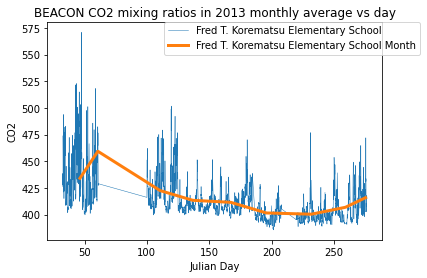

In [18]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot( CO2_2013_data['julian_day'], KC_CO2,linewidth=.5,label='Kaiser Center')
ax.plot( CO2_2013_data_grouped_avg['julian_day'], CO2_2013_data_grouped_avg['co2_ppm_54'],linewidth=3,label='Kaiser Center Month')
plt.xlabel('Julian Day')
plt.ylabel('CO2')
plt.title('BEACON CO2 mixing ratios in 2013 monthly average vs day')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot( CO2_2013_data['julian_day'], FTK_CO2,linewidth=.5,label='Fred T. Korematsu Elementary School')
ax.plot( CO2_2013_data_grouped_avg['julian_day'], CO2_2013_data_grouped_avg['co2_ppm_31'],linewidth=3,label='Fred T. Korematsu Elementary School Month')
plt.xlabel('Julian Day')
plt.ylabel('CO2')
plt.title('BEACON CO2 mixing ratios in 2013 monthly average vs day')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)


**Question 1.3.2** Use your scatter plotting skills from section 1.2 to examine the correlation observed at one-month resolution by plotting the monthly average CO<sub>2</sub> mixing ratios measured at College Preparatory School as a function of the monthly average mixing ratios measured at Fred T. Korematsu Elementary School. Don't forget your red 1:1 line!

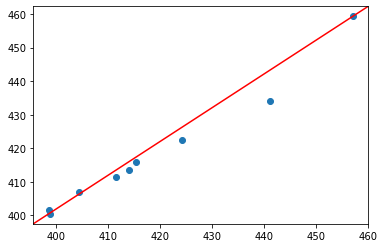

In [19]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.scatter(CO2_2013_data_grouped_avg['co2_ppm_37'], CO2_2013_data_grouped_avg['co2_ppm_31'])
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

**Question 1.3.3** Compared to the one-hour correlation you analyzed in the last section, does the correlation seem to be stronger or weaker at the hourly temporal resolution?


You may notice that one downside of this averaging technique is that you end up with fewer data points in each dataset. In order to minimize the impact of short-term local variations while still preserving the original size of the dataset, a "smoothing" approach is sometimes preferred. Smoothing involves using a moving "window" to calculate an average for every time step of the original dataset, as shown below using a one-month window to smooth the College Preparatory School mixing ratios. 


In [20]:
# set a variable for the number of hours to smooth by
hours_per_month=str(30*24)+'h'

# create a moving-average using the number of hours specified
# this requires moving the 'timestamp' column into the index position if it isn't already
CO2_2013_data_moving_avg=CO2_2013_data.set_index('timestamp').rolling(hours_per_month).mean()

We can compare the averaging and smoothing approaches by plotting the two time series on the same graph.

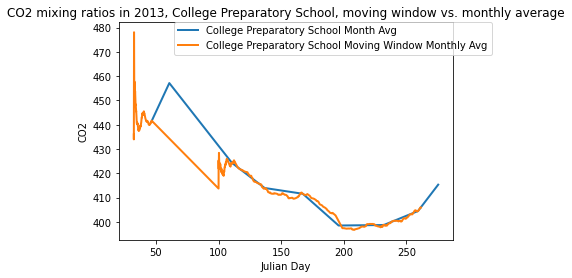

In [21]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot( CO2_2013_data_grouped_avg['julian_day'], CO2_2013_data_grouped_avg['co2_ppm_37'],linewidth=2,label='College Preparatory School Month Avg')
ax.plot( CO2_2013_data_moving_avg['julian_day'], CO2_2013_data_moving_avg['co2_ppm_37'],linewidth=2,label='College Preparatory School Moving Window Monthly Avg')

plt.xlabel('Julian Day')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, College Preparatory School, moving window vs. monthly average')
#add a legend with adjusted position
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

**Question 1.3.4** Practice this yourself by plotting the smoothed CO<sub>2</sub> mixing ratios at the Kaiser Center and Fred T. Korematsu Elementary School using a moving one-month window. Compare the smoothed and monthly-averaged data products by making two graphs with two time series each.

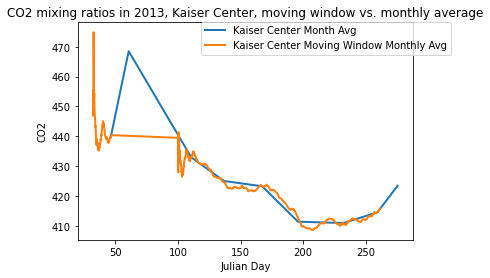

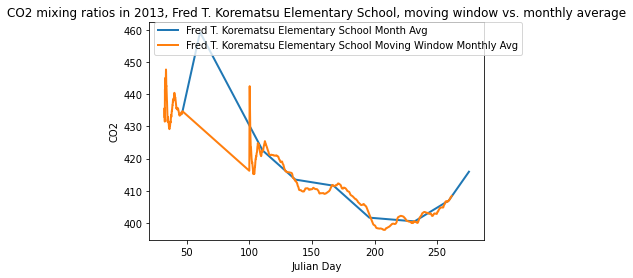

In [22]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot( CO2_2013_data_grouped_avg['julian_day'], CO2_2013_data_grouped_avg['co2_ppm_54'],linewidth=2,label='Kaiser Center Month Avg')
ax.plot( CO2_2013_data_moving_avg['julian_day'], CO2_2013_data_moving_avg['co2_ppm_54'],linewidth=2,label='Kaiser Center Moving Window Monthly Avg')

plt.xlabel('Julian Day')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, Kaiser Center, moving window vs. monthly average')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot( CO2_2013_data_grouped_avg['julian_day'], CO2_2013_data_grouped_avg['co2_ppm_31'],linewidth=2,label='Fred T. Korematsu Elementary School Month Avg')
ax.plot( CO2_2013_data_moving_avg['julian_day'], CO2_2013_data_moving_avg['co2_ppm_31'],linewidth=2,label='Fred T. Korematsu Elementary School Moving Window Monthly Avg')

plt.xlabel('Julian Day')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, Fred T. Korematsu Elementary School, moving window vs. monthly average')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

**Question 1.3.5** Practice your averaging and smoothing skills one more time by choosing a different time window to try (e.g. daily, weekly, etc.).


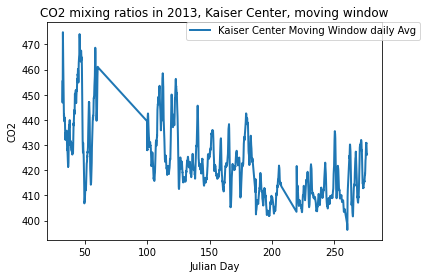

In [23]:
hours_per_day=str(24)+'h'
CO2_2013_data_moving_avg=CO2_2013_data.set_index('timestamp').rolling(hours_per_day).mean()
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot( CO2_2013_data_moving_avg['julian_day'], CO2_2013_data_moving_avg['co2_ppm_54'],linewidth=2,label='Kaiser Center Moving Window daily Avg')

plt.xlabel('Julian Day')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, Kaiser Center, moving window')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

__1.4 Analyzing Temporal Patterns__

Now that you have mastered the art of averaging, you can apply it in more complex ways. Longitudinal datasets like the Bay Area CO<sub>2</sub> mixing ratios you have been working with are invaluable for documenting long-term trends, but they also provide statistically robust records of repeating, short-term phenomena. A classic example of the latter is the 24-hour cycle in mixing ratios that results from regular changes in meteorology and emissions patterns associated with different times of day (e.g., sunrise, rush hour traffic, sunset, etc.). Known as the "diel cycle," understanding this 24-hour pattern gives rich information about the complex interplay of these underlying factors.


The dataframe you have been using to house the hourly CO<sub>2</sub> data provides a convenient shortcut for averaging the data collected at 1am, 2am, etc. as shown in the sample code below. Note that this is a different method of using the "grouby" function. Notice how this changes the datetime index.

In [24]:
CO2_2013_data_grouped_diel=CO2_2013_data.groupby(CO2_2013_data.index.hour).mean()

print(CO2_2013_data_grouped_diel)

                  epoch  julian_day  co2_ppm_37  co2_ppm_54  co2_ppm_31
timestamp                                                              
0          1.371150e+09  164.790140  416.947644  409.018848  412.957068
1          1.371153e+09  164.831806  415.072775  407.862304  412.456545
2          1.371157e+09  164.873473  413.840838  407.514136  412.917801
3          1.371161e+09  164.915140  413.517277  407.792147  412.373822
4          1.371164e+09  164.956806  413.482199  409.374869  413.983770
5          1.371117e+09  164.411623  415.033158  412.676842  417.538947
6          1.371121e+09  164.453289  416.892632  418.892105  420.219474
7          1.371124e+09  164.494956  418.170000  426.963158  420.446316
8          1.371153e+09  164.825044  417.424084  434.595288  417.675393
9          1.371114e+09  164.373026  416.236842  437.648947  415.195789
10         1.371117e+09  164.414693  413.650000  437.788421  414.253684
11         1.371131e+09  164.573080  410.837696  436.272251  413

**Question 1.4.1** Using the "grouped" means generated above, plot the diel cycle in CO<sub>2</sub> mixing ratios measured at the three Bay Area sites.

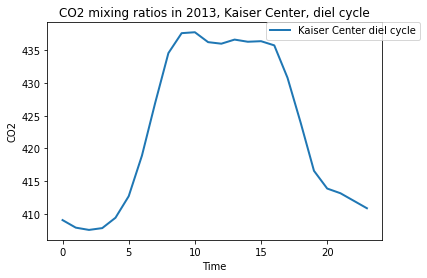

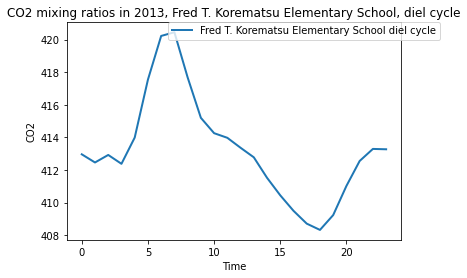

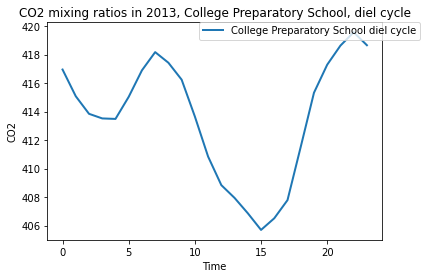

In [25]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(CO2_2013_data_grouped_diel['co2_ppm_54'],linewidth=2,label='Kaiser Center diel cycle')

plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, Kaiser Center, diel cycle')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(CO2_2013_data_grouped_diel['co2_ppm_31'],linewidth=2,label='Fred T. Korematsu Elementary School diel cycle')

plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, Fred T. Korematsu Elementary School, diel cycle')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(CO2_2013_data_grouped_diel['co2_ppm_37'],linewidth=2,label='College Preparatory School diel cycle')

plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, College Preparatory School, diel cycle')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

**Question 1.4.2** When do the highest CO<sub>2</sub> concentrations occur at each site? When do the lowest concentrations occur? Offer a possible explanation for the timing of these maxima and minima and the site-to-site differences.

Another commonly examined temporal pattern is the weekly cycle comparing concentrations observed on Mondays to those measured on Tuesdays, Wednesdays, etc. Since all meteorological patterns are equally likely to occur on all days, the weekly cycle singles out phenomena associated with changes in human behavior (e.g., morning rush hour on weekdays vs. weekend traffic patterns). 


**Question 1.4.3** Devise a strategy for calculating and plotting the weekly cycle in CO<sub>2</sub> mixing ratios measured at the three Bay Area sites.

*Hint: Consult the documentation for the "[Datetime Index](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)" to determine the appropriate modification to the hour-based "groupby" example given above. You may also be interested in referencing [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html) to select data at or between certain times of the day*

In [46]:
CO2_2013_data_rushhour = CO2_2013_data.between_time('6:00:00','9:00:00', include_start=True, include_end=True)
CO2_2013_data_grouped_week = CO2_2013_data_rushhour.groupby(CO2_2013_data_rushhour.index.weekday).mean()
CO2_2013_data_grouped_week

,epoch,julian_day,co2_ppm_37,co2_ppm_54,co2_ppm_31
timestamp,,,,,
0,1.370991e+09,162.956731,417.145192,431.946154,420.532692
1,1.371387e+09,167.536265,416.434259,428.736111,416.768519
2,1.371345e+09,167.049342,418.141228,431.085088,419.822807
3,1.371112e+09,164.351080,418.635185,432.180556,418.364815
4,1.370789e+09,160.611607,424.608036,437.799107,422.083036
5,1.371128e+09,164.536265,415.848148,425.091667,419.778704
6,1.371139e+09,164.665888,409.051402,419.485981,411.128037


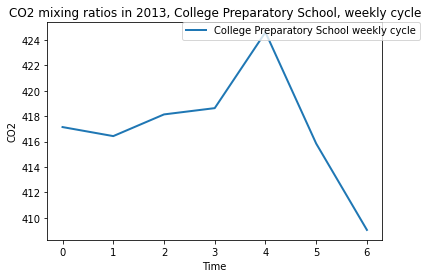

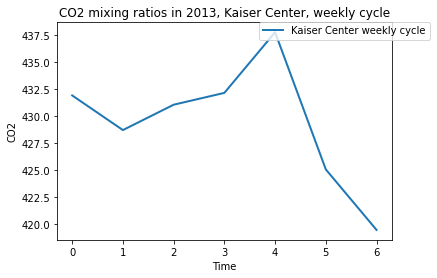

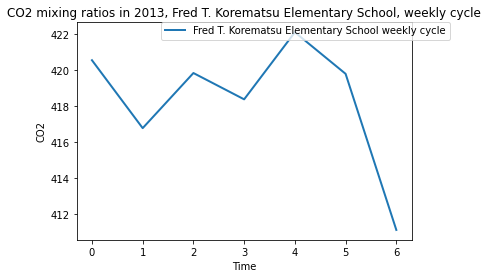

In [47]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(CO2_2013_data_grouped_week['co2_ppm_37'],linewidth=2,label='College Preparatory School weekly cycle')

plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, College Preparatory School, weekly cycle')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(CO2_2013_data_grouped_week['co2_ppm_54'],linewidth=2,label='Kaiser Center weekly cycle')

plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, Kaiser Center, weekly cycle')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(CO2_2013_data_grouped_week['co2_ppm_31'],linewidth=2,label='Fred T. Korematsu Elementary School weekly cycle')

plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 mixing ratios in 2013, Fred T. Korematsu Elementary School, weekly cycle')
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)


**Discussion Questions.** Pair up with a partner and discuss the following:

1. What time(s) of day did you include in your weekly cycle analysis? Why? 
2. Repeat your analysis including different time(s) of day. What seem to be the benefits and drawbacks of your original approach compared to this new one?
3. Day of week analyses are sometimes simplified as a binary "weekday" vs. "weekend" comparison. Of course, one of these two categories will end up with many more data points than the other! If you were to exclude one day of the week from the "weekday" category, what day would you choose and why?
